In [2]:
img = "/content/drive/MyDrive/00000/Sat_Data/images/merged_train_images/Abahani-Field_png.rf.3f78f820459a90776d276cd92a05b611.jpg"

In [3]:
import cv2

# Load the satellite image
image = cv2.imread(img)

# Define two points for the known reference (start and end points of the object)
start_point = (100, 200)  # Example: (x1, y1)
end_point = (300, 200)    # Example: (x2, y2)

# Draw the points for visualization
cv2.circle(image, start_point, 5, (0, 255, 0), -1)  # Green circle at start
cv2.circle(image, end_point, 5, (0, 0, 255), -1)    # Red circle at end
cv2.line(image, start_point, end_point, (255, 0, 0), 2)  # Blue line connecting the points

# Calculate pixel distance
pixel_distance = ((end_point[0] - start_point[0]) ** 2 + (end_point[1] - start_point[1]) ** 2) ** 0.5
print(f"Pixel Distance: {pixel_distance}")

# Save the annotated image for visualization
cv2.imwrite("annotated_image.jpg", image)


Pixel Distance: 200.0


True

In [4]:
import cv2
import numpy as np

# Load the satellite image
image = cv2.imread(img)

# Convert to grayscale (assuming scale bar is black/white)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to isolate the scale bar (adjust threshold as needed)
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Find contours to locate the scale bar
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours to identify the scale bar (e.g., based on its size and position)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Assuming the scale bar is a horizontal line at the bottom of the image
    if 20 < w < 200 and h < 10 and y > image.shape[0] * 0.9:  # Adjust these thresholds
        scale_bar_start = (x, y)
        scale_bar_end = (x + w, y)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a rectangle around the scale bar
        break

# Save the annotated image for verification
cv2.imwrite("scale_bar_detected.jpg", image)

# Measure pixel length of the scale bar
pixel_length = w
print(f"Pixel Length of Scale Bar: {pixel_length}")


Pixel Length of Scale Bar: 1


No scale bar found. Please check the image or adjust thresholds.


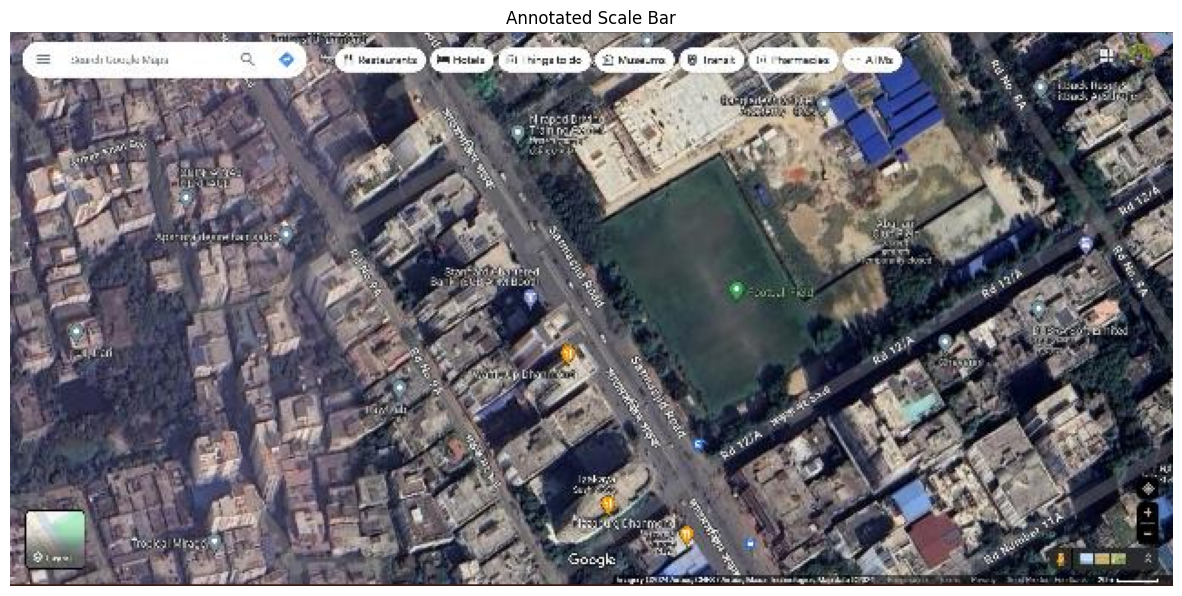

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(img)

# Verify the image is loaded
if image is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# Convert to grayscale (assuming scale bar is black/white)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to isolate the scale bar (adjust threshold values as needed)
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours to find the scale bar
scale_bar_found = False
for contour in contours:
    # Get bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Validate if this contour could be the scale bar
    if 20 < w < 200 and h < 10 and y > image.shape[0] * 0.9:  # Adjust thresholds as needed
        # Draw the detected scale bar on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
        scale_bar_start = (x, y)
        scale_bar_end = (x + w, y)
        pixel_length = w  # Width of the scale bar in pixels
        scale_bar_found = True
        print(f"Scale bar detected! Pixel length: {pixel_length}")
        break

# Check if a scale bar was detected
if not scale_bar_found:
    print("No scale bar found. Please check the image or adjust thresholds.")

# Plot the annotated image to verify the detection
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(image_rgb)
plt.title("Annotated Scale Bar")
plt.axis("off")
plt.show()


In [10]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread(img)

# Verify the image is loaded
if image is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# Get the image dimensions
height, width, _ = image.shape
print(f"Image Dimensions: Width={width}, Height={height}")

# Specify coordinates for the line (adjust these values as needed)
# Start with a line in the bottom-right corner
line_start = (int(width * 0.8), int(height * 0.9))  # Start point (near bottom-right)
line_end = (int(width * 0.95), int(height * 0.9))   # End point (near bottom-right)

# Draw the line on the image
cv2.line(image, line_start, line_end, (0, 255, 0), thickness=1)  # Green line with thicker width

# Annotate the line (optional)
cv2.putText(image, "Reference Line", (line_start[0], line_start[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)  # Blue text above the line

# Convert the image to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(20, 10))
plt.imshow(image_rgb)
plt.title("Reference Line in Bottom-Right Corner")
plt.axis("off")
plt.show()
